In [ ]:
import matplotlib.pyplot as plt
import numpy as np

use_overall_accuracy = True

data = {}
#disregard_datasets = ["ace2004", "aquaint", "msnbc"]
disregard_datasets = []

with open('Results/Multi-Evaluate-Overview/add_datasets_gpt-overview.txt', 'r') as f:
    for idx, line in enumerate(f):
        if idx < 2 or (not ("--" in line and "_" in line)) or line.startswith("#"):
            continue
        corpus = line.split('--')[0].strip()
        param_value = line.split('--')[1].strip().split('_')[-1]
        line = line.split("[TEST]")[1].strip()

        if use_overall_accuracy:
            accuracy = line.split('/')[3].strip().split(' ')[0][:-1]    # Overall Accuracy
            de_accuracy = line.split('/')[4].split('|')[0].strip().split(' ')[0][:-1]   # Overall DE Accuracy
        else:
            accuracy = line.split(' ')[0].strip()[:-1]  # LLM Accuracy
            de_accuracy = line.split('/')[1].strip().split(' ')[0][:-1] # DE Hard Cases Accuracy


        token_count_a = int(line.split('/')[4].split('|')[1].strip().split(' ')[1])
        token_count_b = int(line.split('/')[4].split('|')[1].strip().split(' ')[4])

        execution_time_str = str(line.split('/')[5].split(" | ")[1].strip())
        # Convert execution time in fromat h:mm:ss.xxxxxx to seconds
        h, m, s = execution_time_str.split(":")
        execution_time = int(h) * 3600 + int(m) * 60 + float(s)

        # Add to data dict
        if corpus in disregard_datasets:
            continue
        if corpus not in data:
            data[corpus] = {}
        if param_value not in data[corpus]:
            data[corpus][param_value] = []

        data[corpus][param_value].append((float(accuracy), token_count_a + token_count_b, float(de_accuracy), execution_time))

print(data)


{'AIDA': {'none-none': [(83.72, 393616, 80.18, 28.045413), (83.77, 395499, 80.18, 28.57328), (83.75, 394145, 80.18, 30.78746)], 'categories-none': [(83.66, 554863, 80.18, 26.734039), (83.9, 557786, 80.18, 27.246685), (83.95, 557284, 80.18, 27.738139)], 'none-categories': [(83.84, 548136, 80.18, 26.707451), (83.79, 548194, 80.18, 27.165329), (83.79, 549487, 80.18, 26.733902)]}, 'cweb': {'none-none': [(71.36, 2516415, 69.37, 103.50502900000001), (71.24, 2521738, 69.37, 102.730667), (71.28, 2520006, 69.37, 113.20188)], 'categories-none': [(71.59, 3003267, 69.37, 46.298536), (71.43, 3010686, 69.37, 48.616568), (71.48, 3008615, 69.37, 53.364536)], 'none-categories': [(71.49, 3030587, 69.37, 44.517536), (71.3, 3034145, 69.37, 48.713069), (71.26, 3023321, 69.37, 86.135937)]}, 'tweeki': {'none-none': [(81.78, 78853, 77.22, 44.567496), (81.19, 79507, 77.22, 44.593871), (81.43, 78958, 77.22, 45.735191)], 'categories-none': [(81.31, 84429, 77.22, 43.186101), (80.72, 84321, 77.22, 43.6972), (81.07

In [2]:
token_count = 0
for dataset in data:
    for param in data[dataset]:
        for entry in data[dataset][param]:
            token_count += entry[1]
print(f"Total token count: {token_count}")

Total token count: 38884460


In [3]:
# Compute per-dataset averages (accuracy and token count separately)
avg_data = {}
for dataset, results in data.items():
    avg_data[dataset] = {}
    for param, values in results.items():
        accs = [v[0] for v in values]
        tokens = [v[1] for v in values]
        de_accs = [v[2] for v in values]
        exe_time = [v[3] for v in values]
        avg_data[dataset][param] = {
            "accuracy": round(np.mean(accs), 2),
            "token_count": int(round(np.mean(tokens), 0)),
            "de_accuracy": round(np.mean(de_accs), 2),
            "exe_time": round(np.mean(exe_time), 2)
        }

print(avg_data)


# Compute overall average (accuracy + token count) across datasets for each parameter
all_params = list(next(iter(avg_data.values())).keys())
overall_avg = {}
for param in all_params:
    overall_avg[param] = {
        "accuracy": round(np.mean([results[param]["accuracy"] for results in avg_data.values()]), 2),
        "token_count": int(round(np.mean([results[param]["token_count"] for results in avg_data.values()]), 0)),
        "de_accuracy": round(np.mean([results[param]["de_accuracy"] for results in avg_data.values()]), 2),
        "exe_time": round(np.mean([results[param]["exe_time"] for results in avg_data.values()]), 2)
    }

print(overall_avg)
avg_data


{'AIDA': {'none-none': {'accuracy': 83.75, 'token_count': 394420, 'de_accuracy': 80.18, 'exe_time': 29.14}, 'categories-none': {'accuracy': 83.84, 'token_count': 556644, 'de_accuracy': 80.18, 'exe_time': 27.24}, 'none-categories': {'accuracy': 83.81, 'token_count': 548606, 'de_accuracy': 80.18, 'exe_time': 26.87}}, 'cweb': {'none-none': {'accuracy': 71.29, 'token_count': 2519386, 'de_accuracy': 69.37, 'exe_time': 106.48}, 'categories-none': {'accuracy': 71.5, 'token_count': 3007523, 'de_accuracy': 69.37, 'exe_time': 49.43}, 'none-categories': {'accuracy': 71.35, 'token_count': 3029351, 'de_accuracy': 69.37, 'exe_time': 59.79}}, 'tweeki': {'none-none': {'accuracy': 81.47, 'token_count': 79106, 'de_accuracy': 77.22, 'exe_time': 44.97}, 'categories-none': {'accuracy': 81.03, 'token_count': 84350, 'de_accuracy': 77.22, 'exe_time': 42.53}, 'none-categories': {'accuracy': 81.62, 'token_count': 114701, 'de_accuracy': 77.22, 'exe_time': 49.56}}, 'reddit-comments': {'none-none': {'accuracy': 87

{'AIDA': {'none-none': {'accuracy': 83.75,
   'token_count': 394420,
   'de_accuracy': 80.18,
   'exe_time': 29.14},
  'categories-none': {'accuracy': 83.84,
   'token_count': 556644,
   'de_accuracy': 80.18,
   'exe_time': 27.24},
  'none-categories': {'accuracy': 83.81,
   'token_count': 548606,
   'de_accuracy': 80.18,
   'exe_time': 26.87}},
 'cweb': {'none-none': {'accuracy': 71.29,
   'token_count': 2519386,
   'de_accuracy': 69.37,
   'exe_time': 106.48},
  'categories-none': {'accuracy': 71.5,
   'token_count': 3007523,
   'de_accuracy': 69.37,
   'exe_time': 49.43},
  'none-categories': {'accuracy': 71.35,
   'token_count': 3029351,
   'de_accuracy': 69.37,
   'exe_time': 59.79}},
 'tweeki': {'none-none': {'accuracy': 81.47,
   'token_count': 79106,
   'de_accuracy': 77.22,
   'exe_time': 44.97},
  'categories-none': {'accuracy': 81.03,
   'token_count': 84350,
   'de_accuracy': 77.22,
   'exe_time': 42.53},
  'none-categories': {'accuracy': 81.62,
   'token_count': 114701,
  

In [4]:
vals = []
for dataset in avg_data:
    key = list(avg_data[dataset].keys())[0]
    diff = round(float(avg_data[dataset][key]['accuracy']) - float(avg_data[dataset][key]['de_accuracy']), 2)
    vals.append(diff)
    print(f"{dataset}: {diff}%")

print(f"Average difference: {round(np.mean(vals),2)}%")

AIDA: 3.57%
cweb: 1.92%
tweeki: 4.25%
reddit-comments: 2.36%
shadowlinks-shadow: 6.89%
shadowlinks-tail: 0.19%
shadowlinks-top: 9.4%
reddit-posts: 1.51%
wned-wiki: 0.35%
Average difference: 3.38%


In [11]:
print(overall_avg)

{'none-none': {'accuracy': 83.57, 'token_count': 415869, 'de_accuracy': 80.19, 'exe_time': 53.04}, 'categories-none': {'accuracy': 83.53, 'token_count': 502592, 'de_accuracy': 80.19, 'exe_time': 48.38}, 'none-categories': {'accuracy': 83.73, 'token_count': 521705, 'de_accuracy': 80.19, 'exe_time': 53.96}}


In [6]:
print(np.mean([float(avg_data[dataset][list(avg_data[dataset].keys())[0]]['accuracy']) for dataset in avg_data]))
print(np.mean([float(avg_data[dataset][list(avg_data[dataset].keys())[0]]['token_count']) for dataset in avg_data]))
print(np.mean([float(avg_data[dataset][list(avg_data[dataset].keys())[0]]['exe_time']) for dataset in avg_data]))

83.57222222222222
415869.0
53.04444444444445


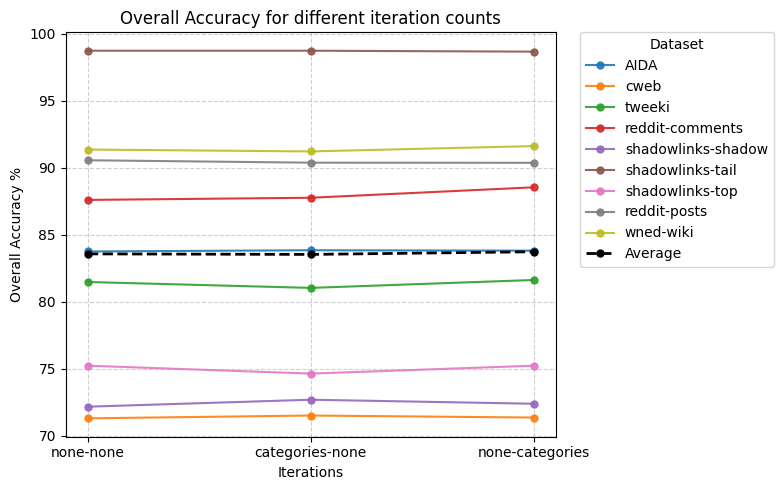

In [7]:
sort = False
in_reverse = False

display_de_accs = False
do_overall_average = True

# --- Plot ---
plt.figure(figsize=(8, 5))

# Create a color palette for datasets
colors = plt.cm.tab10.colors
color_map = {dataset: colors[i % len(colors)] for i, dataset in enumerate(avg_data.keys())}

# Plot per-dataset average accuracies
for dataset, results in avg_data.items():
    if sort:
        results = dict(sorted(results.items(), key=lambda item: float(item[0]), reverse=in_reverse))
    params = list(results.keys())
    avg_accs = [r["accuracy"] for r in results.values()]
    de_accs = [r["de_accuracy"] for r in results.values()]

    base_color = color_map[dataset]

    # Faded (secondary) accuracy
    if display_de_accs:
        plt.plot(params, de_accs, marker="o", linestyle="--", color=base_color, alpha=0.3, markersize=3)

    # Main (primary) accuracy
    plt.plot(params, avg_accs, marker="o", label=dataset, color=base_color, alpha=0.9, markersize=5)


# Plot overall average accuracy (thicker dashed line)
if do_overall_average:
    if sort:
        overall_avg = dict(sorted(overall_avg.items(), key=lambda item: float(item[0]), reverse=in_reverse))
    plt.plot(
        list(overall_avg.keys()),
        [r["accuracy"] for r in overall_avg.values()],
        marker="o",
        color="black",
        markersize=5,
        linewidth=2,
        linestyle="--",
        label="Average",
    )

# Aesthetics
plt.title(f"{'Overall' if use_overall_accuracy else 'LLM'} Accuracy for different iteration counts")
plt.xlabel(f"Iterations")
plt.ylabel(f"{'Overall' if use_overall_accuracy else 'LLM'} Accuracy %")
plt.grid(True, linestyle="--", alpha=0.6)

# Legend outside the plot
plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()

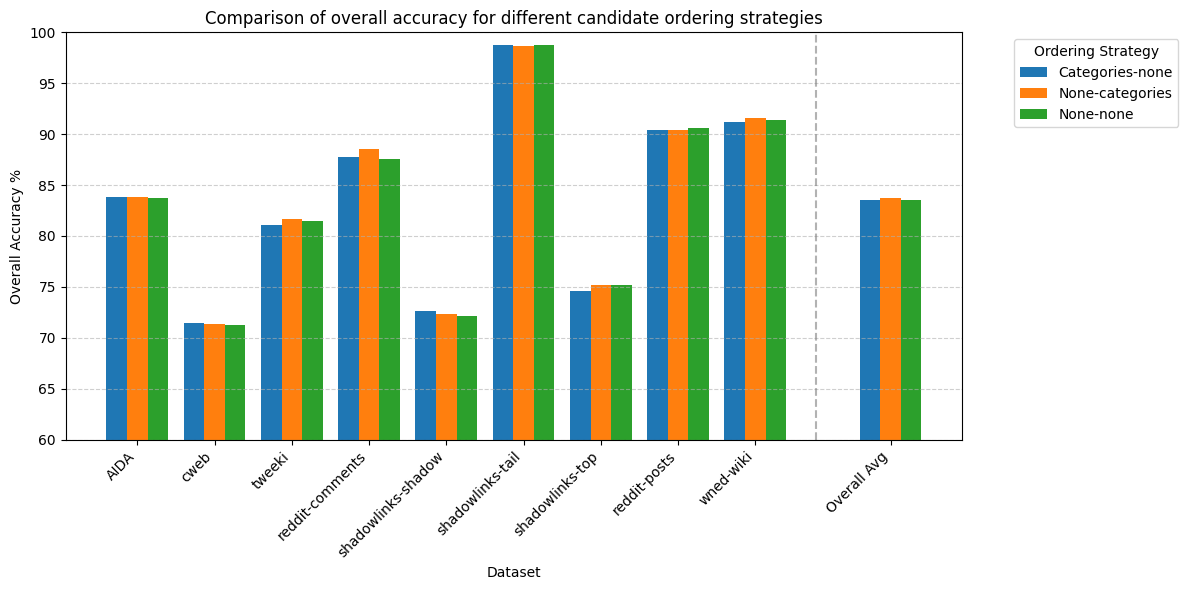

In [8]:
do_bar_plot = True

compare_again_de_accs = False

replace_param = {
    "0": "No Verbalizations",
    "5": "Verbalizations"
}

if do_bar_plot:

    sort = False
    in_reverse = False

    # --- Gather all parameter names across datasets ---
    all_params = {p for dataset_data in avg_data.values() for p in dataset_data.keys()}

    # --- Process datasets ---
    processed_data = {}
    for dataset, results in avg_data.items():
        if sort:
            results = dict(sorted(results.items(), key=lambda item: float(item[0]), reverse=in_reverse))
        processed_data[dataset] = results

    datasets = list(processed_data.keys())
    num_datasets = len(datasets)
    num_params = len(all_params)

    # Add space for the "Overall Average" slot
    x = np.arange(num_datasets + 1, dtype=float)
    gap = 0.75
    x[-1] += gap   # push the “overall avg” cluster rightward
    bar_width = 0.8 / num_params

    plt.figure(figsize=(12, 6))

    colors = plt.cm.tab10.colors

    # --- Compute overall averages ---
    overall_avg_values = []
    for param in all_params:
        # collect accuracy across datasets for this parameter
        vals = []
        for dataset in datasets:
            d = processed_data[dataset].get(param)
            if d and "accuracy" in d:
                vals.append(d["accuracy"])

        overall_avg_values.append(np.mean(vals) if vals else None)

    # --- Plot grouped bars (datasets + overall) ---
    for i, param in enumerate(all_params):

        param_values = []
        for dataset in datasets:
            param_value = processed_data[dataset].get(param, {}).get("accuracy", None)
            param_values.append(param_value)

        # Append the overall average value at the end
        param_values.append(overall_avg_values[i])

        plt.bar(
            x + i * bar_width,
            param_values,
            width=bar_width,
            label=f"{replace_param.get(param, param).capitalize()}",
            color=colors[i % len(colors)]
        )

    # --- X-axis labels ---
    all_labels = datasets + ["Overall Avg"]

    plt.xticks(
        x + bar_width * (num_params - 1) / 2,
        all_labels,
        rotation=45,
        ha="right"
    )

    # --- Aesthetics ---
    separator_x = (x[-2] + x[-1]) / 1.96
    plt.axvline(separator_x, color="gray", linestyle="--", alpha=0.6)
    plt.ylim(60, 100)
    plt.xlabel("Dataset")
    plt.ylabel(f"{'Overall' if use_overall_accuracy else 'LLM'} Accuracy %")
    plt.title(f"Comparison of {'overall' if use_overall_accuracy else 'LLM'} accuracy for different candidate ordering strategies")
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.legend(title="Ordering Strategy", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [9]:
overall_avg

{'none-none': {'accuracy': 83.57,
  'token_count': 415869,
  'de_accuracy': 80.19,
  'exe_time': 53.04},
 'categories-none': {'accuracy': 83.53,
  'token_count': 502592,
  'de_accuracy': 80.19,
  'exe_time': 48.38},
 'none-categories': {'accuracy': 83.73,
  'token_count': 521705,
  'de_accuracy': 80.19,
  'exe_time': 53.96}}

### Print as latex table

In [10]:
for key in overall_avg:
    param_data = overall_avg[key]
    if use_overall_accuracy:
        print(f"{key} & {param_data['accuracy']}\% & & {param_data['token_count']} & \\\\")
    else:
        print(f"{key} & & {param_data['accuracy']}\% & {param_data['token_count']} & \\\\")
    print("\\hline")

none-none & 83.57\% & & 415869 & \\
\hline
categories-none & 83.53\% & & 502592 & \\
\hline
none-categories & 83.73\% & & 521705 & \\
\hline
